In [1]:
from ctext import *
%pylab inline
%matplotlib
import matplotlib as mpl
import platform

if platform.system() == 'Darwin':   # I.e. if we're running on Mac OS X
    mpl.rcParams['font.family'] = 'Arial Unicode MS'
else:
    mpl.rcParams['font.family'] = "SimHei"
mpl.rcParams['font.size'] = 14

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

setapikey("596b8cdac07fccbdf11559bdc41ecf6b")

Populating the interactive namespace from numpy and matplotlib
Using matplotlib backend: Qt5Agg


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.decomposition as sklearnPCA

# This line tells the matplotlib library to display its output in our Jupyter notebook
%matplotlib inline 

import re

def makevector(string, termlist, normalize = False):
    vector = []
    for term in termlist:
        termcount = len(re.findall(term, string))
        if normalize:
            vector.append(termcount/len(string))
        else:
            vector.append(termcount)
    return vector

In [3]:
texts = ["ctp:wb894040", "ctp:wb900066", "ctp:wb70888", "ctp:wb842383","ctp:wb728938","ctp:wb763355","ctp:wb885546","ctp:wb954825","ctp:hongloumeng","ctp:wb944468"]                

mycolors = ["blue", "red", "green", "orange", "cyan", "black", "yellow","pink","brown","gray"]
passages = []


def gettextflat(urn):
    text = gettext(urn)
    if 'fulltext' in text:
        asstring = ""
        for para in range(0, len(text['fulltext'])):
            asstring = asstring + text['fulltext'][para] + "\n\n"
        return [asstring]
    if 'subsections' in text:
        chapterlist = []
        for subsection in text['subsections']:
            chapterlist = chapterlist + gettextflat(subsection)
        return chapterlist
    return []

for text in texts:
    passages.append(gettextflat(text)) 

In [6]:
terms = [ "父", "心", "禮","義","君","民","法","儒","道","周","惡","善","王","國","師","夫","死","子","臣","仕","官","賢","貞節"]
# We want a single DataFrame with all our vectors in it, labeled so we know which vectors go with which text
# Start by making an empty DataFrame
df_joined = pd.DataFrame([], columns=terms)
df_joined["text"] = None

vectors = []
texttitle = []
# For each book, make each chapter into a vector
for textnum in range(0,len(texts)):
    textinfo = gettextinfo(texts[textnum])
    desc = textinfo['title']
    if 'author' in textinfo:
        desc = desc + "（" + textinfo['author'] + "）"
    texttitle.append(desc)
    myvectors = []
    for p in passages[textnum]:
        myvectors.append(makevector(p, terms, True))
    vectors.append(myvectors)
    df_thisbook = pd.DataFrame(myvectors, columns=terms)
    df_thisbook['text'] = texts[textnum]
    df_joined = pd.concat([df_joined, df_thisbook])

display(df_joined)
df_joined.to_excel('style difference.xlsx')


,父,心,禮,義,君,民,法,儒,道,周,...,師,夫,死,子,臣,仕,官,賢,貞節,text
0,0.000000,0.004598,0.000000,0.009195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004598,0.004598,0.009195,0.000000,0.000000,0.000000,0.000000,0.000000,ctp:wb894040
1,0.002833,0.000000,0.000708,0.002125,0.000708,0.000000,0.000708,0.000000,0.002833,0.000000,...,0.000708,0.001416,0.000000,0.002125,0.000708,0.000000,0.000708,0.000000,0.000000,ctp:wb894040
2,0.000339,0.004062,0.000677,0.000000,0.000000,0.000339,0.000000,0.000000,0.001354,0.000000,...,0.000000,0.001693,0.000000,0.003047,0.000000,0.000000,0.001693,0.001354,0.000000,ctp:wb894040
3,0.000000,0.005294,0.000000,0.000000,0.001444,0.000000,0.000000,0.000000,0.002406,0.000000,...,0.000000,0.000962,0.001444,0.005294,0.000000,0.000000,0.000000,0.000000,0.000000,ctp:wb894040
4,0.001836,0.002448,0.000000,0.000000,0.000612,0.000000,0.000000,0.000000,0.001836,0.001224,...,0.000000,0.001224,0.002448,0.010404,0.000000,0.000000,0.000000,0.000000,0.000000,ctp:wb894040
5,0.000000,0.003137,0.000000,0.000000,0.000784,0.000000,0.000000,0.000000,0.001569,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ctp:wb894040
6,0.000000,0.003423,0.000000,0.000000,0.000000,0.000428,0.000000,0.000000,0.001712,0.000000,...,0.000000,0.001712,0.000856,0.002567,0.000000,0.000000,0.000000,0.000428,0.000000,ctp:wb894040
7,0.000000,0.001362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001362,0.000000,...,0.000000,0.000000,0.000000,0.001362,0.001362,0.000000,0.000000,0.000000,0.000000,ctp:wb894040
8,0.000000,0.001917,0.000639,0.000000,0.000639,0.000000,0.000000,0.000000,0.003834,0.000000,...,0.000000,0.000639,0.000000,0.001278,0.000000,0.000000,0.000000,0.000000,0.000000,ctp:wb894040
9,0.000000,0.007241,0.000000,0.000000,0.001609,0.000000,0.000000,0.000000,0.002414,0.000000,...,0.000000,0.000805,0.001207,0.002011,0.000000,0.000000,0.000000,0.000000,0.000000,ctp:wb894040


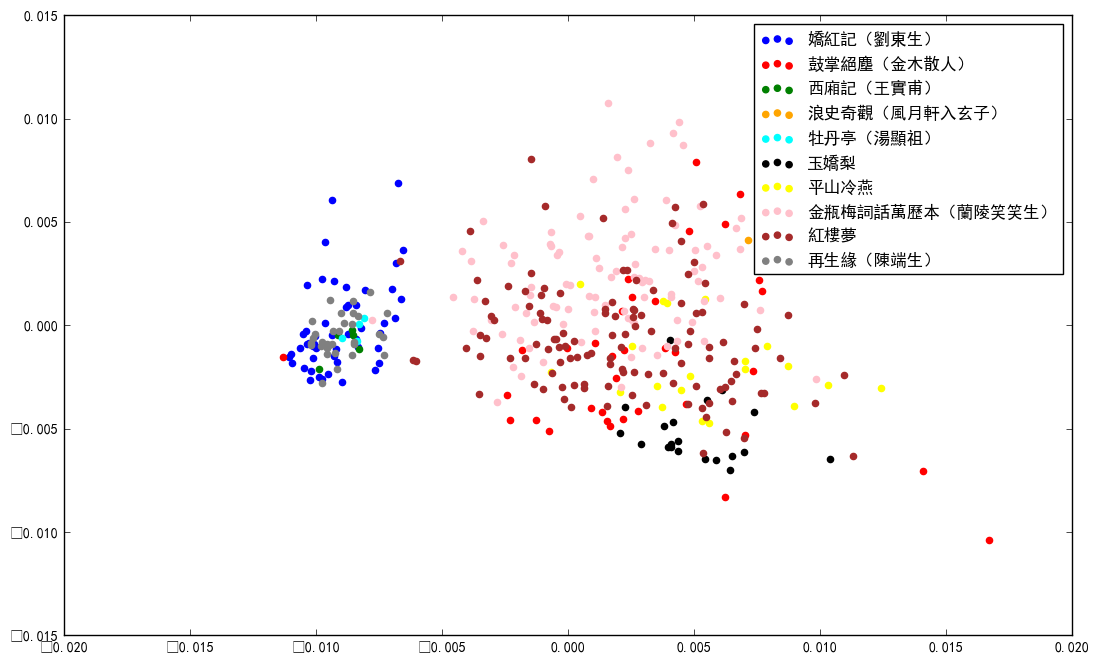

In [11]:
x = df_joined.ix[:,0:-1].values
y = df_joined.ix[:,-1].values

sklearn_pca = sklearnPCA.PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(x)

headings = texts

plt.figure(figsize=(13,8))
mylegends = []
for textnum in range(0, len(headings)):
    name = headings[textnum]
    thislegend = plt.scatter(Y_sklearn[y==name,0], Y_sklearn[y==name,1], color=mycolors[textnum], label=texttitle[textnum])
    mylegends.append(thislegend)

plt.legend(handles = mylegends)
plt.show()